## Downloading and Storing Images from Google

In [ ]:
import os
import shutil
from google_images_download import google_images_download
from random import shuffle
import matplotlib.pyplot as plt
import math

In [ ]:
%matplotlib inline

In [ ]:
response = google_images_download.googleimagesdownload()

In [ ]:
%%capture
arguments = {"keywords":"Cricket Batsman,Baseball Batter", "limit":200, "format":"jpg", "chromedriver":"/usr/bin/chromedriver"}
#the chromedriver argument needs to be adjusted for your system to indicate the correct path
response.download(arguments)

In [ ]:
baseball_files = os.listdir('downloads/Baseball Batter')

In [ ]:
baseball_files[:5]

In [ ]:
for file in baseball_files:
    try:
        img = plt.imread(f'downloads/Baseball Batter/{file}')
    except OSError:
        os.remove(f'downloads/Baseball Batter/{file}')

In [ ]:
baseball_files = os.listdir('downloads/Baseball Batter')
print(len(baseball_files))

In [ ]:
cricket_files = os.listdir('downloads/Cricket Batsman')

for file in cricket_files:
    try:
        img = plt.imread(f'downloads/Cricket Batsman/{file}')
    except (OSError,ValueError):
        os.remove(f'downloads/Cricket Batsman/{file}')

cricket_files = os.listdir('downloads/Cricket Batsman');
print(len(cricket_files))

In [ ]:
train_frac = 0.7; #adjust size of training set
PATH = 'datasets/batsmen/' #location for storing dataset

In [ ]:
os.makedirs(f'{PATH}train/baseball')
os.makedirs(f'{PATH}valid/baseball')

shuffle(baseball_files)
train_size = math.floor(len(baseball_files)*train_frac)

In [ ]:
for file in baseball_files[:train_size]:
    os.rename(f'downloads/Baseball Batter/{file}', f'{PATH}train/baseball/{file}')

for file in baseball_files[train_size:]:
    os.rename(f'downloads/Baseball Batter/{file}', f'{PATH}valid/baseball/{file}')

In [ ]:
os.makedirs(f'{PATH}train/cricket')
os.makedirs(f'{PATH}valid/cricket')

shuffle(cricket_files)
train_size = math.floor(len(cricket_files)*train_frac)

In [ ]:
for file in cricket_files[:train_size]:
    os.rename(f'downloads/Cricket Batsman/{file}', f'{PATH}train/cricket/{file}')

for file in cricket_files[train_size:]:
    os.rename(f'downloads/Cricket Batsman/{file}', f'{PATH}valid/cricket/{file}')

In [ ]:
shutil.rmtree('downloads') 

In [ ]:
def plot(location):  
    files = os.listdir(f'{PATH}{location}')
    shuffle(files)
    fig = plt.figure(figsize=(16,8))
    for i in range(8):
        img = plt.imread(f'{PATH}{location}/{files[i]}')
        fig.add_subplot(2,4,i+1)
        plt.imshow(img)

#Plots 8 random images from a directory by passing the relative location from PATH

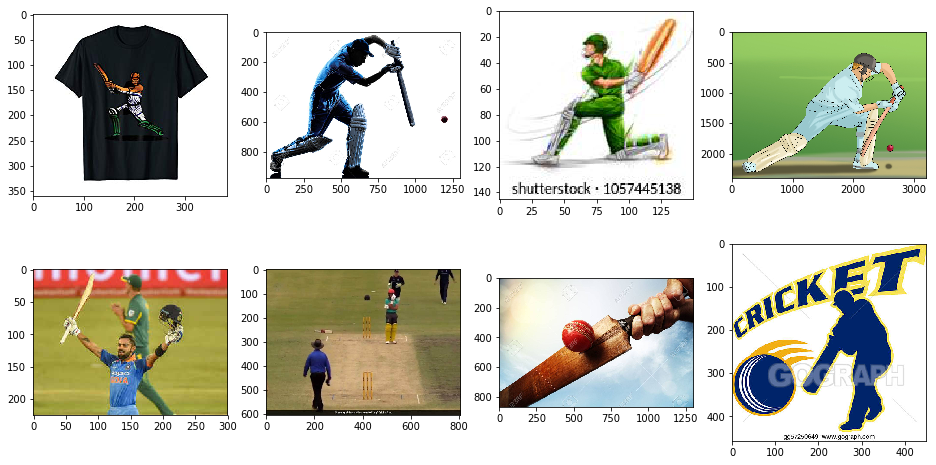

In [ ]:
plot('train/cricket')

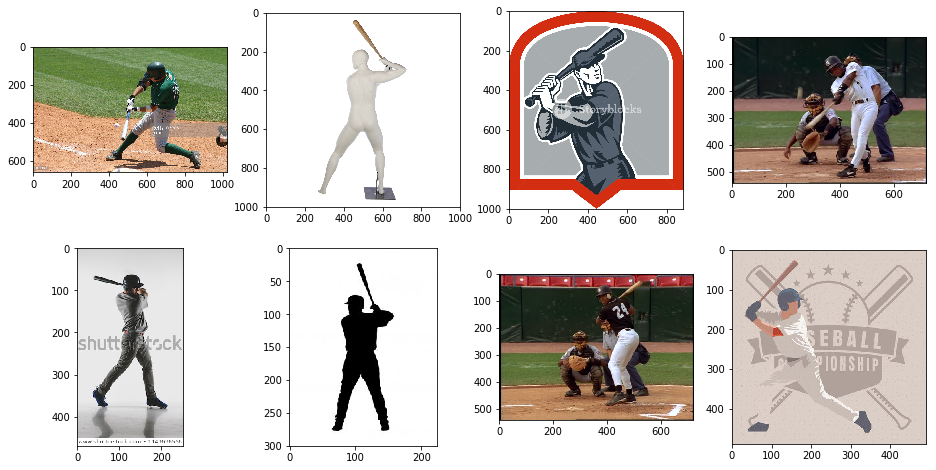

In [ ]:
plot('valid/baseball')